# Predicting Stock Prices Using Regression on Moving Averages

In [27]:
# import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
warnings.filterwarnings('ignore')

## Simple Moving Average (SMA)

In [11]:
# import the closing price data of META stock for the period of 2 years -

meta_df = pd.read_csv('../data/META.csv')
meta_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800


In [61]:
# Create 20 days simple moving average column
# meta_df['20_SMA'] = meta_df['Adj Close'].rolling(window = 20, min_periods = 1).mean()
# convert Date column to datetime
meta_df['Date'] = pd.to_datetime(meta_df['Date'], format = '%Y-%m-%d')
# sort by datetime
meta_df.sort_values(by='Date', inplace=True, ascending=True)

# Create 50 days simple moving average column
meta_df['50_SMA'] = meta_df['Close'].rolling(window = 50, min_periods = 1).mean()
meta_df.dropna()
meta_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50_SMA
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800,210.770004
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900,214.040001
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500,209.500000
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100,204.142502
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800,200.136002


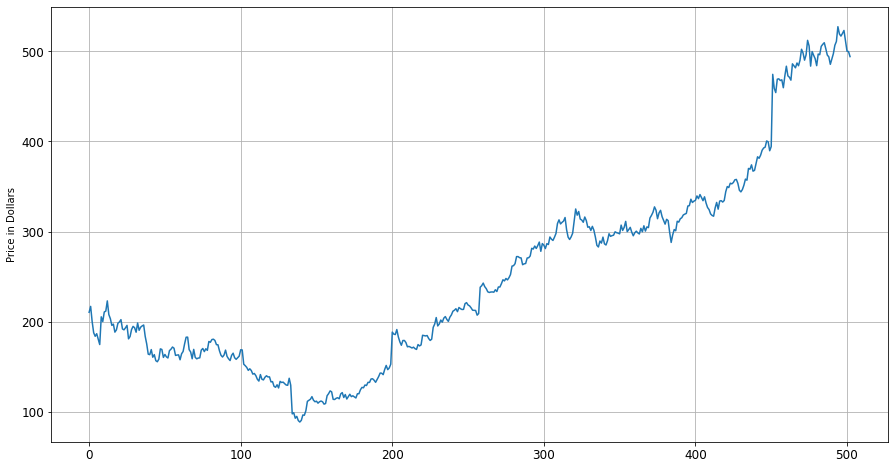

In [37]:
# visualize data
meta_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Dollars')
plt.show()

In [47]:
# # train test split
# test_size = 0.2
# training_size = 1 - test_size

# test_num = int(test_size * len(meta_df))
# train_num = int(training_size * len(meta_df))

# train = meta_df[:train_num][['Date', 'Adj Close', '50_SMA']]
# test = meta_df[train_num:][['Date', 'Adj Close', '50_SMA']]

# test.head()

# lr = LinearRegression()
# lr.fit(train[['Adj Close']], train['50_SMA'])
# y_pred = lr.predict(test[['Date', 'Adj Close']])

KeyError: "None of [Index(['date', 'adj close'], dtype='object')] are in the [columns]"

Model Coefficients: [[1.06666437]]
Mean Absolute Error: 28.587179978277906
Coefficient of Determination: 0.7102370325097314


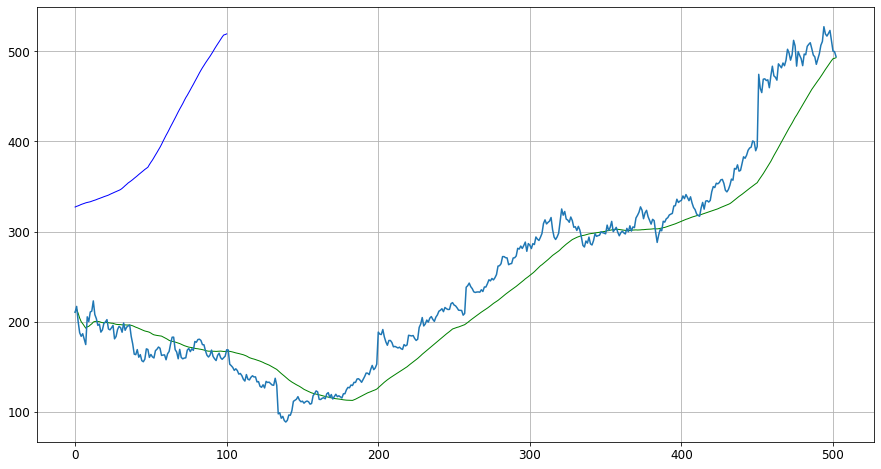

In [71]:
X_train, X_test, y_train, y_test = train_test_split(meta_df[['50_SMA']], meta_df[['Adj Close']], test_size=.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Model Coefficients:", lr.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

plt.figure(figsize = (20, 10))
meta_df['50_SMA'].plot(color = 'g', lw = 1)
plt.plot(y_pred, color = 'b', lw = 1)
meta_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.show()

# why does the blue line show up on the left rip


## Exponential Moving Average (EMA)

In [4]:
# import the closing price data of META stock for the period of 2 years -

meta_df = pd.read_csv('../data/META.csv')

In [5]:
# Create 20 days exponential moving average column
meta_df['20_EMA'] = meta_df['Close'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
meta_df['50_EMA'] = meta_df['Close'].ewm(span = 50, adjust = False).mean()

In [6]:
from tabulate import tabulate

df_new = meta_df[(meta_df['Position'] == 1) | (meta_df['Position'] == -1)]
df_new['Position'] = df_new['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_new, headers = 'keys', tablefmt = 'psql'))

KeyError: 'Position'